In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

Downloading Stock Price data of 10 years for NIFTY50 and TCS

In [ ]:
data_nsei = yf.download('^NSEI', period='10y')
(data_nsei.head())

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2015-01-29,8952.349609,8966.650391,8861.250000,8901.500000,256300
2015-01-30,8808.900391,8996.599609,8775.099609,8996.599609,267300
2015-02-02,8797.400391,8840.799805,8751.099609,8802.500000,210100
2015-02-03,8756.549805,8837.299805,8726.650391,8823.150391,208700
2015-02-04,8723.700195,8792.849609,8704.400391,8789.150391,195300


In [ ]:
data_tcs = yf.download('TCS.NS', period='10y')
(data_tcs.head())

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2015-01-29,1086.001221,1096.265258,1072.451011,1083.163187,3734392
2015-01-30,1059.285034,1098.954054,1054.142335,1092.851104,5817402
2015-02-02,1073.005737,1076.099879,1050.749296,1059.263500,3181802
2015-02-03,1091.805420,1094.686173,1069.975755,1071.917512,2345054
2015-02-04,1073.048462,1097.545489,1067.841789,1095.966431,2245418


In [ ]:
last_date = {}
l = {}

In [ ]:
# Most recent date in data
last_date['nsei'] = data_nsei.index[-1].date()
last_date['tcs'] = data_tcs.index[-1].date()
print(last_date)

{'nsei': datetime.date(2025, 1, 29), 'tcs': datetime.date(2025, 1, 29)}


Statistics of Stocks

In [ ]:
data_nsei.describe()

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
count,2462.000000,2462.000000,2462.000000,2462.000000,2.462000e+03
mean,13627.468220,13700.178372,13551.994023,13637.869541,3.230335e+05
std,5027.870089,5047.779463,5006.177338,5029.102353,1.944635e+05
min,6970.600098,7034.200195,6825.799805,7023.649902,0.000000e+00
25%,9514.412598,9588.087402,9450.649902,9518.249756,1.957000e+05
50%,11579.149902,11619.550293,11521.399902,11594.375000,2.637000e+05
75%,17604.799316,17685.499512,17492.025391,17612.687012,3.840750e+05
max,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06


In [ ]:
data_tcs.describe()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
count,2469.000000,2469.000000,2469.000000,2469.000000,2.469000e+03
mean,2298.199309,2321.125705,2275.832377,2298.966797,2.668555e+06
std,1068.127146,1077.282710,1059.601208,1068.282355,2.389983e+06
min,925.495789,942.608407,903.802639,932.433261,8.682200e+04
25%,1141.598389,1153.406446,1127.654238,1139.924640,1.640676e+06
50%,2003.551147,2026.290168,1981.598249,2005.885354,2.211366e+06
75%,3258.512451,3283.606846,3226.034685,3254.918395,3.088298e+06
max,4531.868164,4570.183163,4490.318390,4554.010849,8.806715e+07


Visualizing Stock Prices over the years

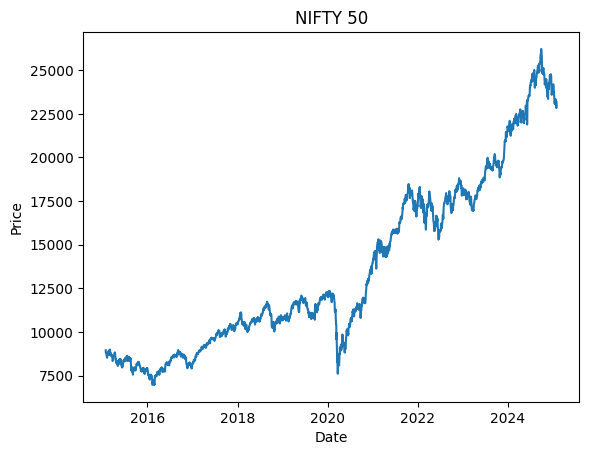

In [ ]:
plt.plot(data_nsei['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NIFTY 50')
plt.show()

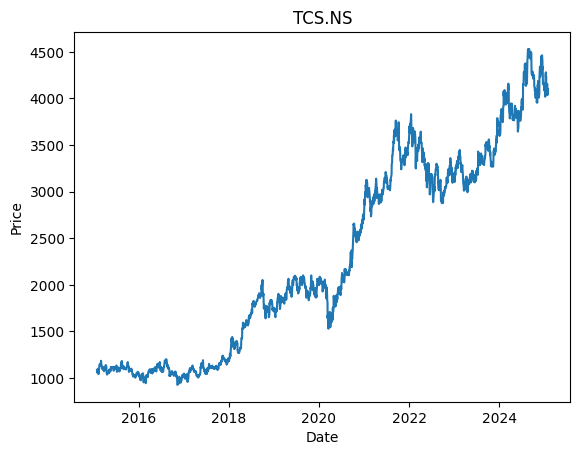

In [ ]:
plt.plot(data_tcs['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS.NS')
plt.show()

Train-Test split

In [ ]:
l['nsei'] = len(data_nsei['Close'])
data_nsei_train = data_nsei[:int(0.8 * l['nsei'])]
data_nsei_test = data_nsei[int(0.8 * l['nsei']):]

In [ ]:
l['tcs'] = len(data_tcs['Close'])
data_tcs_train = data_tcs[:int(0.8 * l['tcs'])]
data_tcs_test = data_tcs[int(0.8 * l['tcs']):]

Stationarity Check

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_nsei = adfuller(data_nsei_train['Close'])
print(adf_nsei)
if adf_nsei[1] < 0.05:
    print('Stationary')
else:
    print('Not Stationary')

(np.float64(-0.2859602283302096), np.float64(0.9274693808906919), 7, 1961, {'1%': np.float64(-3.43368905179724), '5%': np.float64(-2.86301499720276), '10%': np.float64(-2.567555228165442)}, np.float64(24323.00678449001))
Not Stationary


In [ ]:
adf_tcs = adfuller(data_tcs_train['Close'])
print(adf_tcs)
if adf_tcs[1] < 0.05:
    print('Stationary')
else:
    print('Not Stationary')

(np.float64(-0.3411534609844062), np.float64(0.9194701557234768), 0, 1974, {'1%': np.float64(-3.43366703339965), '5%': np.float64(-2.8630052761696607), '10%': np.float64(-2.567550052177805)}, np.float64(19037.137693130604))
Not Stationary


In [ ]:
# Differencing for Stationarity
data_diff_nsei = data_nsei_train.Close.diff(2).dropna()
data_diff_tcs = data_tcs_train.Close.diff(2).dropna()

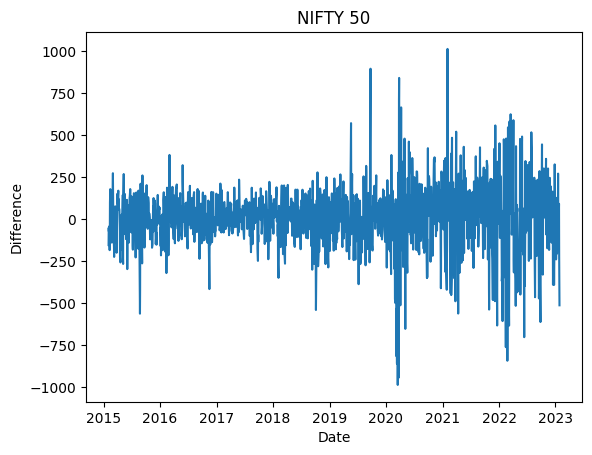

In [ ]:
plt.plot(data_diff_nsei)
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('NIFTY 50')
plt.show()

In [ ]:
adf_diff_nsei = adfuller(data_diff_nsei)
print(adf_diff_nsei)
if adf_diff_nsei[1] < 0.05:
    print('Stationary')
else:
    print('Not Stationary')

(np.float64(-7.360788518643756), np.float64(9.512748040702073e-11), 26, 1940, {'1%': np.float64(-3.4337252441664483), '5%': np.float64(-2.8630309758314314), '10%': np.float64(-2.56756373605059)}, np.float64(24383.48218233888))
Stationary


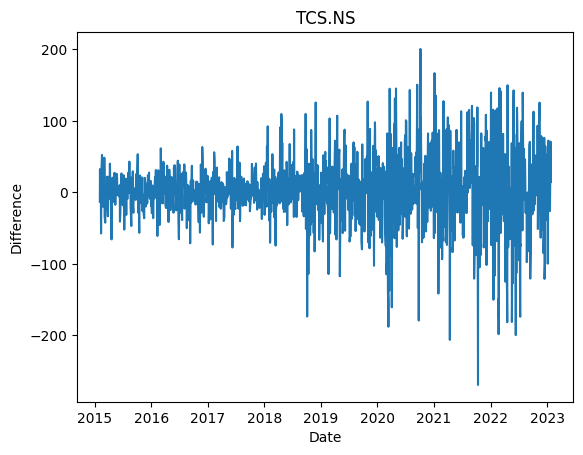

In [ ]:
plt.plot(data_diff_tcs)
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('TCS.NS')
plt.show()

NIFTY 50


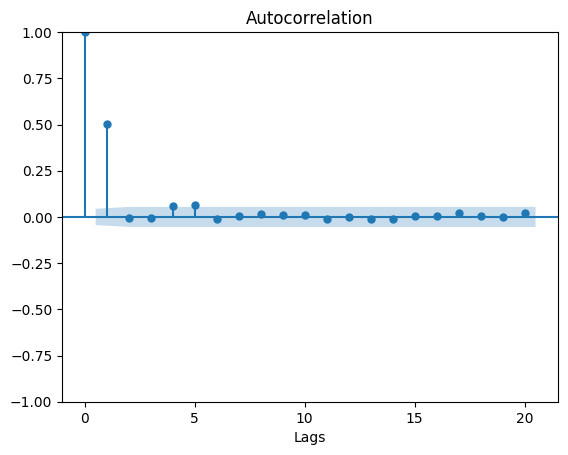

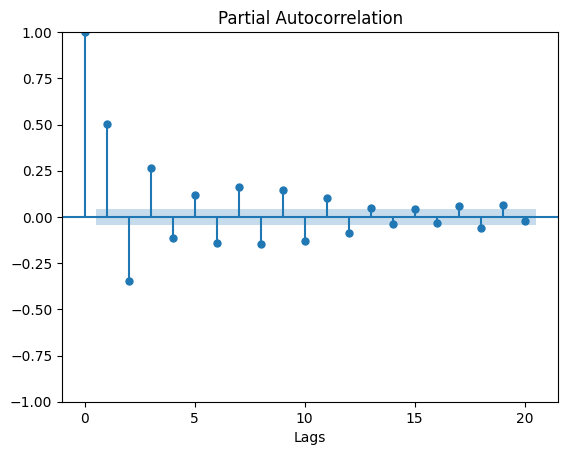

In [ ]:
# ACF and PACF Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print('NIFTY 50')
plot_acf(data_diff_nsei, lags=20)
plt.xlabel('Lags')
plt.show()
plot_pacf(data_diff_nsei, lags=20)
plt.xlabel('Lags')
plt.show()

In [ ]:
adf_diff_tcs = adfuller(data_diff_tcs)
print(adf_diff_tcs)
if adf_diff_tcs[1] < 0.05:
    print('Stationary')
else:
    print('Not Stationary')

(np.float64(-9.355419686208554), np.float64(8.084070525777883e-16), 24, 1948, {'1%': np.float64(-3.4337113644639197), '5%': np.float64(-2.863024848081541), '10%': np.float64(-2.5675604733017385)}, np.float64(19095.957779131986))
Stationary


TCS.NS


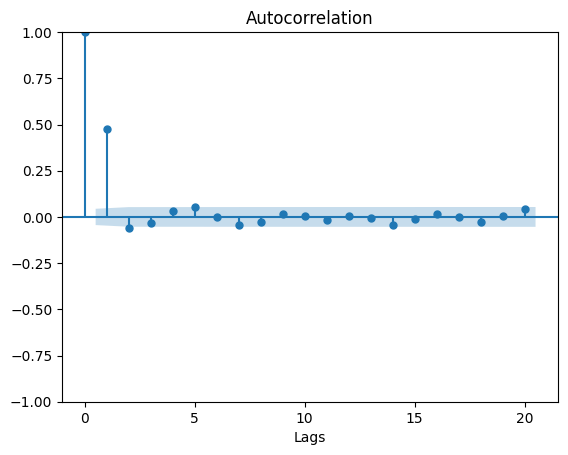

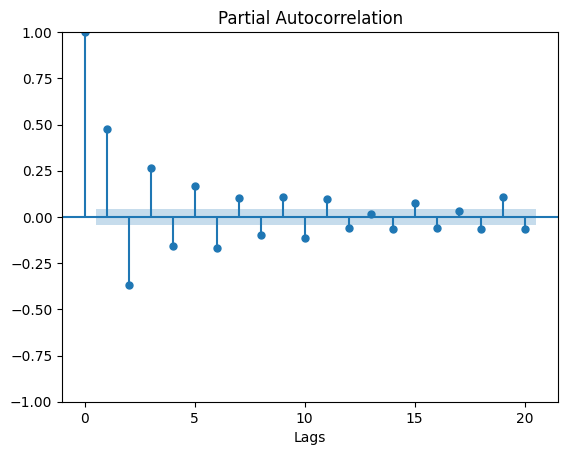

In [ ]:
print('TCS.NS')
plot_acf(data_diff_tcs, lags=20)
plt.xlabel('Lags')
plt.show()
plot_pacf(data_diff_tcs, lags=20)
plt.xlabel('Lags')
plt.show()


Creating ARIMA model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA


def model(data, p, d, q, s, name):
    data_Close = data['Close']

    # ARIMA Model
    '''model = ARIMA(data_Close, order=(p, d, q))
    model_fit = model.fit()
    model_prediction_train = model_fit.predict(start=1, end= int(0.8*l[f'{name}']))
    model_prediction_test = model_fit.forecast(steps=l[f'{name}'] - int(0.8*l[f'{name}']))
    forecast_length = len(pd.date_range(start=last_date[f'{name}'], end='2025-12-31').values)12
    model_forecast = model_fit.forecast(steps= l[f'{name}'] - int(0.8*l[f'{name}']) + forecast_length)
    model_forecast = model_forecast.iloc[-forecast_length:]'''

    # SARIMA model
    model = SARIMAX(data_Close, order=(p, d, q), seasonal_order=(1, 1, 1, s))
    model_fit = model.fit()
    model_prediction_train = model_fit.predict(start=1, end=int(0.8 * l[f'{name}']))
    model_prediction_test = model_fit.predict(start=int(0.8 * l[f'{name}']) + 1, end=l[f'{name}'])
    #model_prediction_test = model_fit.forecast(steps=l - int(0.8*l))
    forecast_length = len(pd.date_range(start=last_date[f'{name}'], end='2025-12-31').values)
    model_forecast = model_fit.forecast(steps=l[f'{name}'] - int(0.8 * l[f'{name}']) + forecast_length)
    model_forecast = model_forecast.iloc[-forecast_length:]

    return model_prediction_train, model_prediction_test, model_forecast

`residuals()` calculates residuals left from arima model

In [ ]:
def residuals(data, predictions):
    data = data['Close'].values
    data = data.flatten()
    predictions = predictions.values
    residuals = data - predictions
    return residuals

`calculate_error()` calculates RMSE, MASE, MAPE

In [ ]:
def calculate_error(data, predictions):
    data_pred = data['Close'].values
    data_pred = data_pred.flatten()
    data_pred = np.array(data_pred)
    predictions = np.array(predictions)
    rmse = np.sqrt(np.mean((data_pred - predictions) ** 2))
    forecast_diff = np.diff(predictions)
    mase_denom = np.mean(np.abs(forecast_diff))
    mase_num = np.mean(np.abs(predictions - data_pred))
    mase = mase_num / mase_denom
    mape = 100 * np.mean(np.abs(data_pred - predictions) / data_pred)
    return rmse, mase, mape

`plot()` plots Predictions and Forecasts

In [ ]:
def plot(data, predictions_train, predictions_test, forecast, name):
    # Align predictions with the original index
    pred_train_index = data.Close.index[:int(0.8 * l[f'{name}'])]  # Align predictions with the original index
    pred_test_index = data.Close.index[int(0.8 * l[f'{name}']):]
    # Create forecast_index without overlapping the original data index
    forecast_index = pd.date_range(start=last_date[f'{name}'], end='2025-12-31').values
    # Plot original data
    plt.plot(data.Close, label="Actual Data", color="blue")

    # Plot model predictions
    plt.plot(pred_train_index, predictions_train, label="Predictions on Train Dataset", color="green")
    plt.plot(pred_test_index, predictions_test, label="Predictions on Test Dataset", color="orange")
    # Plot the forecast data without duplicating the original data
    plt.plot(forecast_index, forecast, label="Forecast till year end", color="red")

    # Titles and labels
    plt.title(f"Predictions and Forecast of {name}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

In [ ]:
#for cleaner terminal output
import warnings
warnings.simplefilter(action='ignore', category=Warning)

arima_pred_train_nsei, arima_pred_test_nsei, arima_forecast_nsei = model(data_nsei_train, 4, 2, 3, 10, 'nsei')

In [ ]:
rmse, mase, mape = calculate_error(data_nsei_test, arima_pred_test_nsei.values)
print('NIFTY 50')
print('RMSE: ', rmse)
print('MASE: ', mase)
print('MAPE: ', mape)

NIFTY 50
RMSE:  1854.593915303295
MASE:  130.18746284803777
MAPE:  6.431862471632222


NIFTY 50


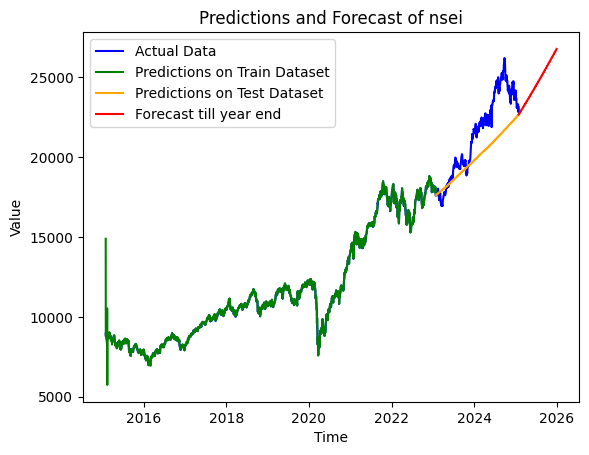

In [ ]:
print('NIFTY 50')
plot(data_nsei, arima_pred_train_nsei, arima_pred_test_nsei, arima_forecast_nsei, 'nsei')

In [ ]:
arima_pred_train_tcs, arima_pred_test_tcs, arima_forecast_tcs = model(data_tcs_train, 4, 2, 3, 7, 'tcs')

In [ ]:
rmse, mase, mape = calculate_error(data_tcs_test, arima_pred_test_tcs.values)
print('TCS.NS')
print('RMSE: ', rmse)
print('MASE: ', mase)
print('MAPE: ', mape)

TCS.NS
RMSE:  230.22445140247396
MASE:  82.14919994288125
MAPE:  5.606257495658378


TCS.NS


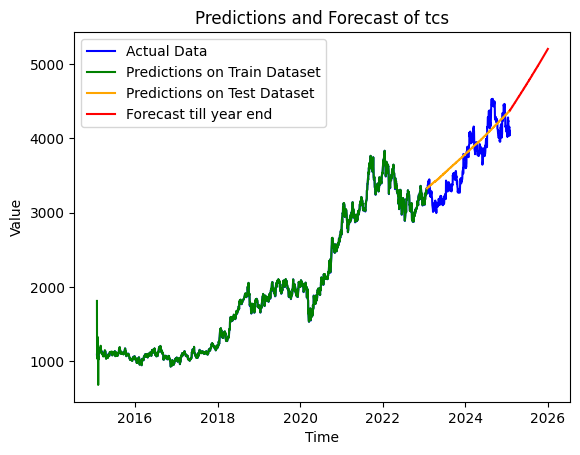

In [ ]:
print('TCS.NS')
plot(data_tcs, arima_pred_train_tcs, arima_pred_test_tcs, arima_forecast_tcs, 'tcs')

In [ ]:
import torch
import torch.nn as nn

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


LSTM model for residual prediction

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, input_seq):
        # Forward pass through LSTM
        lstm_out, _ = self.lstm(input_seq.view(len(input_seq), 1, -1))
        pred = self.fc(lstm_out.view(len(input_seq), -1))  # Selecting the last output
        return pred[-1]

In [ ]:
# Initialize model, loss, and optimizer
LSTM_Model_nsei = LSTM(input_dim=1, hidden_dim=15, output_dim=1).to(device)
criterion = nn.MSELoss()
optimizer_nsei = torch.optim.Adam(LSTM_Model_nsei.parameters(), lr=0.01)

In [ ]:
LSTM_Model_tcs = LSTM(input_dim=1, hidden_dim=15, output_dim=1).to(device)
optimizer_tcs = torch.optim.Adam(LSTM_Model_tcs.parameters(), lr=0.01)

In [ ]:
import random

# for creating lags for lstm model to train on
def to_inout_seq(input_data, seq_len):
    inout_seq = []
    l = len(input_data)
    for i in range(l - seq_len):
        train_seq = input_data[i:i + seq_len]
        train_label = input_data[i + seq_len:i + seq_len + 1]
        inout_seq.append((train_seq, train_label))
    random.shuffle(inout_seq)
    return inout_seq[:int(0.1 * len(inout_seq))]

In [ ]:
residuals_array_nsei = residuals(data_nsei_test, arima_pred_test_nsei)

In [ ]:
residuals_array_tcs = residuals(data_tcs_test, arima_pred_test_tcs)

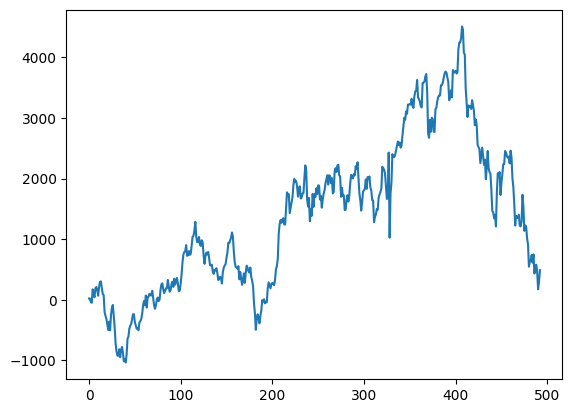

In [ ]:
plt.plot(residuals_array_nsei)

In [ ]:
# min-max normalization of data
res_min_nsei = min(residuals_array_nsei)
res_max_nsei = max(residuals_array_nsei)
residuals_array_nsei_normalized = (residuals_array_nsei - res_min_nsei) / (res_max_nsei - res_min_nsei)

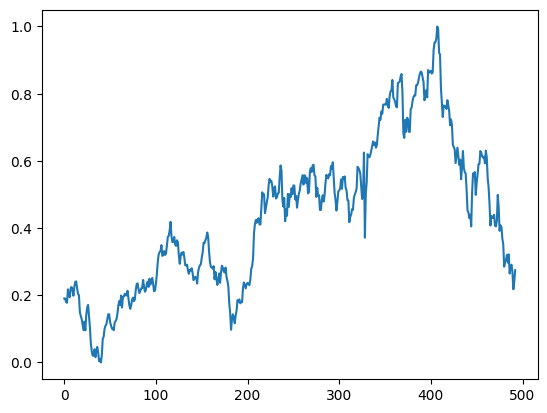

In [ ]:
plt.plot(residuals_array_nsei_normalized)

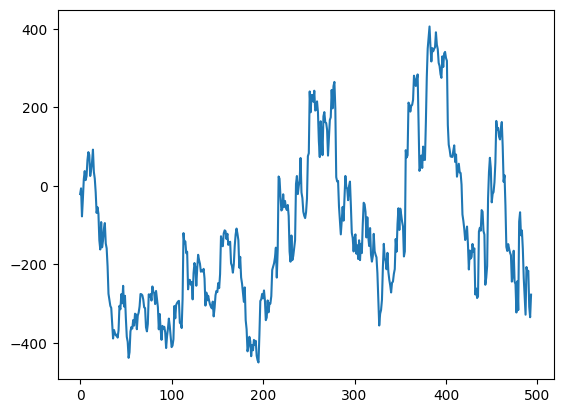

In [ ]:
plt.plot(residuals_array_tcs)

In [ ]:
res_min_tcs = min(residuals_array_tcs)
res_max_tcs = max(residuals_array_tcs)
residuals_array_tcs_normalized = (residuals_array_tcs - res_min_tcs) / (res_max_tcs - res_min_tcs)

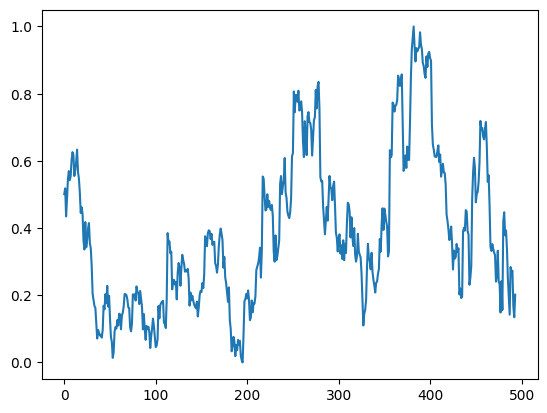

In [ ]:
plt.plot(residuals_array_tcs_normalized)

In [ ]:
# Training loop
num_epochs = 20
losses = []
train_data_lstm = to_inout_seq(residuals_array_nsei_normalized, 10)
for epoch in range(num_epochs):
    for seq, label in train_data_lstm:
        optimizer_nsei.zero_grad()
        # Forward pass
        seq = torch.tensor(seq, dtype=torch.float32).to(device)
        label = torch.tensor(label, dtype=torch.float32).to(device)
        outputs = LSTM_Model_nsei(seq)

        # Compute loss
        loss = criterion(outputs, label)
        loss.backward()
        optimizer_nsei.step()
    losses.append(loss.item())
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [5/20], Loss: 0.0002
Epoch [10/20], Loss: 0.0001
Epoch [15/20], Loss: 0.0002
Epoch [20/20], Loss: 0.0002


NIFTY 50


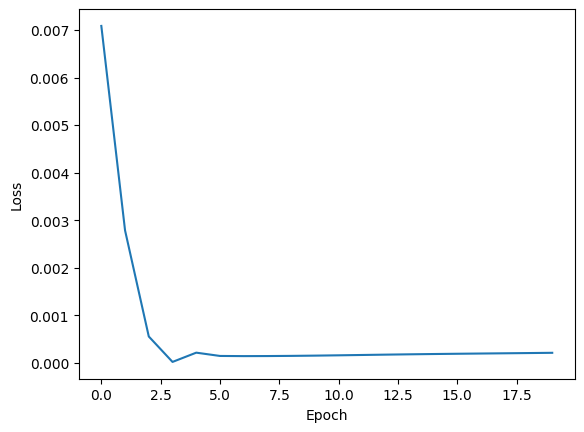

In [ ]:
print('NIFTY 50')
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#predictions
residuals_nsei_fin = []
pred_nsei_fin = []
for i in range(len(arima_pred_test_nsei)):
    if i < 10:
        pred = arima_pred_test_nsei.values[i].item()
        pred_nsei_fin.append(pred)
    else:
        pred = arima_pred_test_nsei.values[i].item()
        with torch.no_grad():
            seq = torch.tensor(residuals_nsei_fin[-10:], dtype=torch.float32).to(device)
            LSTM_residual = LSTM_Model_nsei(seq)
        pred += (LSTM_residual.view(-1).item()) * (res_max_nsei - res_min_nsei) + res_min_nsei
        pred_nsei_fin.append(pred)
    residual = (data_nsei_test['Close'].values[i].item() - arima_pred_test_nsei.values[i].item() - res_min_nsei) / (res_max_nsei - res_min_nsei)
    residuals_nsei_fin.append(residual)

In [ ]:
#forecast
forecast_nsei_fin = []
for i in range(len(arima_forecast_nsei)):
    forecast = arima_forecast_nsei.values[i].item()
    with torch.no_grad():
        seq = torch.tensor(residuals_nsei_fin[-10:], dtype=torch.float32).to(device)
        LSTM_residual = LSTM_Model_nsei(seq)
    forecast += (LSTM_residual.view(-1).item()) * (res_max_nsei - res_min_nsei) + res_min_nsei
    forecast_nsei_fin.append(forecast)
    residuals_nsei_fin.append(LSTM_residual.view(-1).numpy(force=True).astype(np.float64)[0])

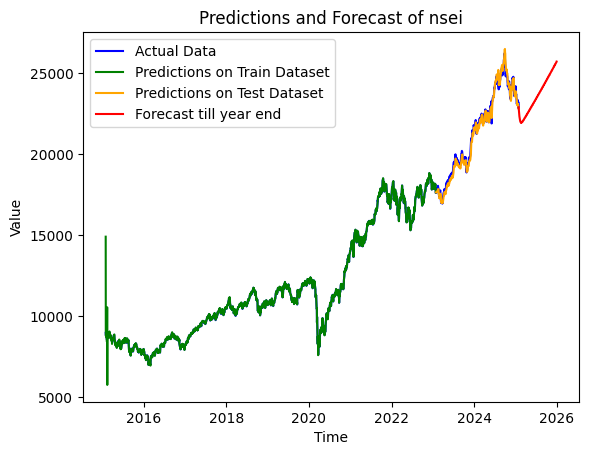

In [ ]:
plot(data_nsei, arima_pred_train_nsei, pred_nsei_fin, forecast_nsei_fin, 'nsei')

In [ ]:
rmse, mase, mape = calculate_error(data_nsei_test, pred_nsei_fin)
print('NIFTY 50')
print('RMSE: ', rmse)
print('MASE: ', mase)
print('MAPE: ', mape)

NIFTY 50
RMSE:  245.1177250514975
MASE:  2.366658164340201
MAPE:  0.9213219511766392


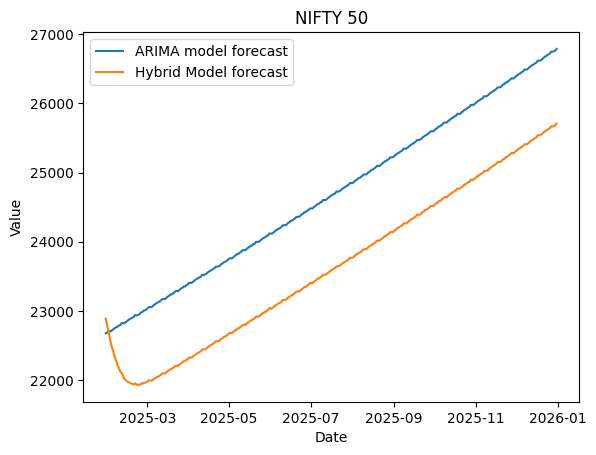

In [ ]:
index = pd.date_range(start=last_date['nsei'], end='2025-12-31')
plt.plot(index, arima_forecast_nsei.values, label= 'ARIMA model forecast')
plt.plot(index, forecast_nsei_fin, label= 'Hybrid Model forecast')
plt.title('NIFTY 50')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

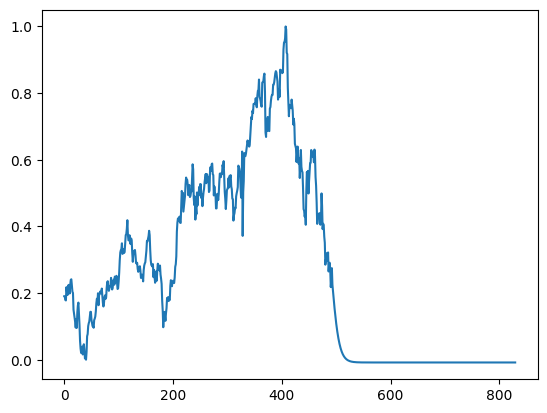

In [ ]:
plt.plot(residuals_nsei_fin)

In [ ]:
# Training loop
num_epochs = 20
losses = []
train_data_lstm = to_inout_seq(residuals_array_tcs_normalized, 10)
for epoch in range(num_epochs):
    for seq, label in train_data_lstm:
        optimizer_tcs.zero_grad()
        # Forward pass
        seq = torch.tensor(seq, dtype=torch.float32).to(device)
        label = torch.tensor(label, dtype=torch.float32).to(device)
        outputs = LSTM_Model_tcs(seq)

        # Compute loss
        loss = criterion(outputs, label)
        loss.backward()
        optimizer_tcs.step()
    losses.append(loss.item())
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [5/20], Loss: 0.0006
Epoch [10/20], Loss: 0.0002
Epoch [15/20], Loss: 0.0003
Epoch [20/20], Loss: 0.0004


TCS.NS


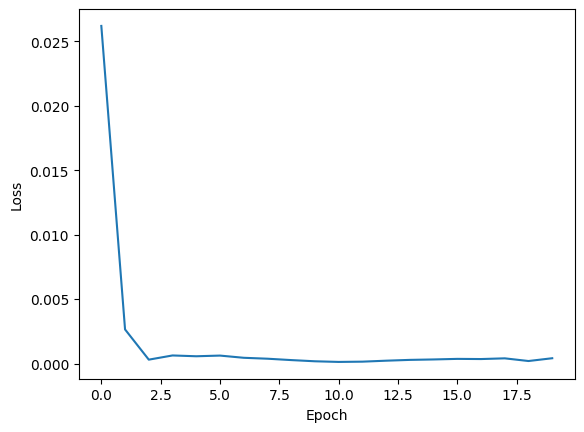

In [ ]:
print('TCS.NS')
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#predictions
residuals_tcs_fin = []
pred_tcs_fin = []
for i in range(len(arima_pred_test_tcs)):
    if i < 10:
        pred = arima_pred_test_tcs.values[i].item()
        pred_tcs_fin.append(pred)
    else:
        pred = arima_pred_test_tcs.values[i].item()
        pred1 = pred
        with torch.no_grad():
            seq = torch.tensor(residuals_tcs_fin[-10:], dtype=torch.float32).to(device)
            LSTM_residual = LSTM_Model_tcs(seq)
        pred += (LSTM_residual.view(-1).item()) * (res_max_tcs - res_min_tcs) + res_min_tcs
        pred_tcs_fin.append(pred)
    residual = (data_tcs_test['Close'].values[i].item() - arima_pred_test_tcs.values[i].item() - res_min_tcs) / (res_max_tcs - res_min_tcs)
    residuals_tcs_fin.append(residual)

In [ ]:
#forecast
forecast_tcs_fin = []
for i in range(len(arima_forecast_tcs)):
    forecast = arima_forecast_tcs.values[i].item()
    with torch.no_grad():
        seq = torch.tensor(residuals_tcs_fin[-10:], dtype=torch.float32).to(device)
        LSTM_residual = LSTM_Model_tcs(seq)
    forecast += (LSTM_residual.view(-1).item()) * (res_max_tcs - res_min_tcs) + res_min_tcs
    forecast_tcs_fin.append(forecast)
    residuals_tcs_fin.append(LSTM_residual.view(-1).numpy(force=True).astype(np.float64)[0])

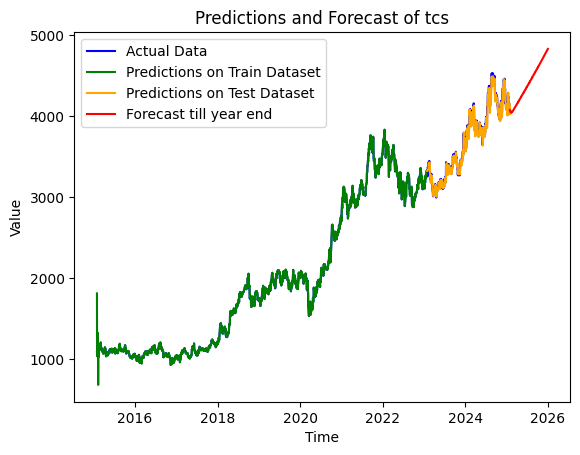

In [ ]:
plot(data_tcs, arima_pred_train_tcs, pred_tcs_fin, forecast_tcs_fin, 'tcs')

In [ ]:
rmse, mase, mape = calculate_error(data_tcs_test, pred_tcs_fin)
print('TCS.NS')
print('RMSE: ', rmse)
print('MASE: ', mase)
print('MAPE: ', mape)

TCS.NS
RMSE:  53.573402048720425
MASE:  1.0832833697681132
MAPE:  1.0344698919286652


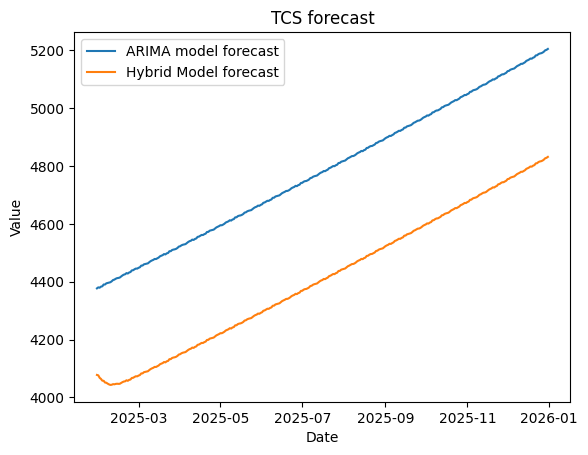

In [ ]:
index = pd.date_range(start=last_date['tcs'], end='2025-12-31')
plt.plot(index, arima_forecast_tcs.values, label= 'ARIMA model forecast')
plt.plot(index, forecast_tcs_fin, label= 'Hybrid Model forecast')
plt.title('TCS forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

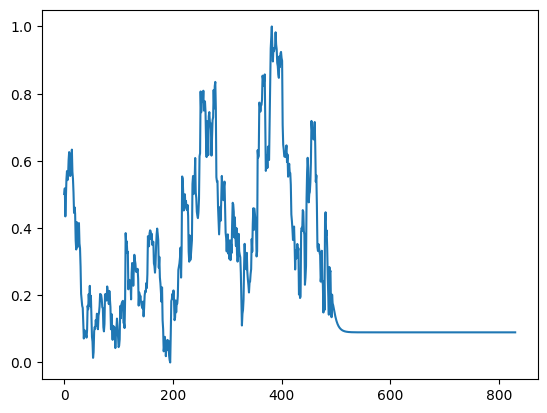

In [ ]:
plt.plot(residuals_tcs_fin)

**Forecast Analysis**<br>
Both the stocks will increase till the year-end.
TCS is expected to reach nearly 4800 and NIFTY50 to cross 25000 in value. Therefore, considering their expected growth, buying these stocks could be a strategic investment decision.